In [2]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as py
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [4]:
x,y= make_classification(
    n_samples=100, 
    n_features=1, 
    n_classes=2,
    n_clusters_per_class=1, 
    flip_y=0.03, 
    n_informative=1, 
    n_redundant=0, 
    n_repeated=0
)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

trdata=pd.read_csv(r'C:\Users\DELL\Documents\trlist.csv')
trdata.head(10)

,Substationcode,Circlecode,Transformervolt rated,Maxvolt actual,Minvolt actual,Max volt permissible,Min volt permissible,Deviation max volt,Deviation min volt,Status max volt,Status min volt
0,1010001,101,110,110.0,95.0,121.0,99.0,11.0,4.0,1,0
1,1010002,101,110,116.0,103.0,121.0,99.0,5.0,-4.0,1,1
2,1010003,101,110,109.0,91.2,121.0,99.0,12.0,7.8,1,0
3,1010004,101,110,109.0,91.2,121.0,99.0,12.0,7.8,1,0
4,1020001,102,22,24.5,19.5,24.2,19.8,-0.3,0.3,0,0
5,1020002,102,11,12.8,10.0,12.1,9.9,-0.7,-0.1,0,1
6,1020003,102,11,11.4,10.4,12.1,9.9,0.7,-0.5,1,1
7,1020004,102,33,37.0,28.0,36.3,29.7,-0.7,1.7,0,0
8,1020005,102,22,23.0,20.0,24.2,19.8,1.2,-0.2,1,1
9,1020006,102,22,24.2,18.9,24.2,19.8,0.0,0.9,0,0


In [6]:
trdata.shape

(499, 11)

In [7]:
trdata.isnull().sum()

Substationcode           0
Circlecode               0
Transformervolt rated    0
Maxvolt actual           0
Minvolt actual           0
Max volt permissible     0
Min volt permissible     0
Deviation max volt       0
Deviation min volt       0
Status max volt          0
Status min volt          0
dtype: int64

In [8]:
y=trdata['Status max volt']
x=trdata.drop(['Status max volt'], axis=1)
print(x)
print(y)

     Substationcode  Circlecode  Transformervolt rated  Maxvolt actual  \
0           1010001         101                    110           110.0   
1           1010002         101                    110           116.0   
2           1010003         101                    110           109.0   
3           1010004         101                    110           109.0   
4           1020001         102                     22            24.5   
..              ...         ...                    ...             ...   
494         8030020         803                     22            22.6   
495         8030021         803                     22            23.5   
496         8030022         803                     22            24.4   
497         8030023         803                     22            23.0   
498         8030024         803                     22            26.0   

     Minvolt actual  Max volt permissible  Min volt permissible  \
0              95.0                 121.0   

In [9]:
trdata.describe

<bound method NDFrame.describe of      Substationcode  Circlecode  Transformervolt rated  Maxvolt actual  \
0           1010001         101                    110           110.0   
1           1010002         101                    110           116.0   
2           1010003         101                    110           109.0   
3           1010004         101                    110           109.0   
4           1020001         102                     22            24.5   
..              ...         ...                    ...             ...   
494         8030020         803                     22            22.6   
495         8030021         803                     22            23.5   
496         8030022         803                     22            24.4   
497         8030023         803                     22            23.0   
498         8030024         803                     22            26.0   

     Minvolt actual  Max volt permissible  Min volt permissible  \
0         

In [10]:
trdata.columns

Index(['Substationcode', 'Circlecode', 'Transformervolt rated',
       'Maxvolt actual', 'Minvolt actual', 'Max volt permissible',
       'Min volt permissible', 'Deviation max volt', 'Deviation min volt',
       'Status max volt', 'Status min volt'],
      dtype='object')

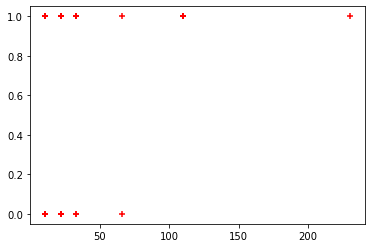

In [11]:
plt.scatter(trdata['Transformervolt rated'], trdata['Status max volt'], marker='+',color='red')

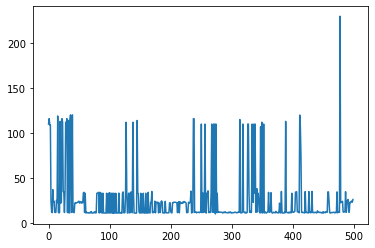

In [12]:
plt.plot(trdata['Maxvolt actual'])

<AxesSubplot:xlabel='Status max volt', ylabel='count'>

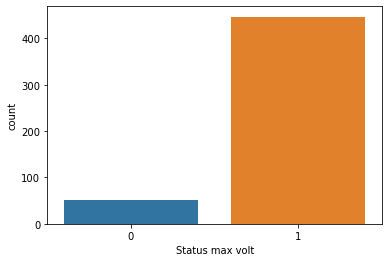

In [13]:
sns.countplot(x='Status max volt', data=trdata)

<AxesSubplot:xlabel='Status min volt', ylabel='count'>

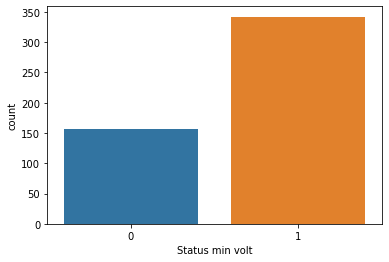

In [14]:
sns.countplot(x='Status min volt', data=trdata)

<AxesSubplot:xlabel='Status max volt', ylabel='count'>

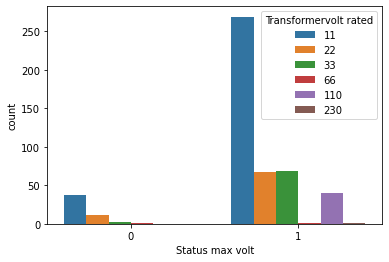

In [15]:
sns.countplot(x='Status max volt', hue='Transformervolt rated', data=trdata)

In [16]:
trdata.isnull().sum()

Substationcode           0
Circlecode               0
Transformervolt rated    0
Maxvolt actual           0
Minvolt actual           0
Max volt permissible     0
Min volt permissible     0
Deviation max volt       0
Deviation min volt       0
Status max volt          0
Status min volt          0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logmodel=LogisticRegression()

In [21]:
log_fit=logmodel.fit(x_train,y_train)

In [22]:
predictions=log_fit.predict(x_test)

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.87      1.00      0.93       130

    accuracy                           0.87       150
   macro avg       0.43      0.50      0.46       150
weighted avg       0.75      0.87      0.80       150



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test, predictions)

array([[  0,  20],
       [  0, 130]], dtype=int64)